# Pymaceuticals Inc.
---

### Analysis

#In the study the mice showed a strong positive correlation for weight and tumor mass size. When focusing in on the Capomulin treatment the tumor mass made sharp declines followed by small increases several times, but ultimately showed a reduction in mass tumor volume. The distribution of sex of the mice were fairly even which can add to the generalization of this study. Further research would have to be done to see if sex made a difference in the effectiveness of the treatment.  Capomulin also showed a smaller range of outliers in comaprison to 3 other drugs tested Ramicane, Infubinol, and Ceftamin.  This would seem to indicate the effectiviness of the drug Capomulin is fairly consitent, when compared to other drugs in the study.
 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
single = pd.merge(study_results, mouse_metadata,  on="Mouse ID")
# Display the data table for preview
single.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [65]:
# Checking the number of mice.
no_mice = len(single['Mouse ID'].unique())
no_mice

249

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = pd.DataFrame(single,
                          columns = ['Mouse ID', 'Timepoint'])
duplicates = duplicates_df[duplicates_df.duplicated()]

print(duplicates['Mouse ID'])

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object


In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
G989_df = pd.DataFrame(single.loc[single["Mouse ID"]=='g989',:])
G989_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_single = single.loc[(
single["Mouse ID"] != 'g989')]
reduced_single.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [69]:
# Checking the number of mice in the clean DataFrame.
no_mice_two = len(reduced_single['Mouse ID'].unique())
no_mice_two

248

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stat = reduced_single.groupby(['Drug Regimen'])
mean = stat[['Tumor Volume (mm3)']].mean() 
median = stat[['Tumor Volume (mm3)']].median()
variance = stat[['Tumor Volume (mm3)']].var()
standard_dev = stat[['Tumor Volume (mm3)']].std()
sem = stat[['Tumor Volume (mm3)']].sem()
summary_stats = pd.concat([mean, median,variance,standard_dev,sem], axis=1)
summary_stats.columns.values[0:5] =["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.","Tumor Volume Std. Err."]

# Assemble the resulting series into a single summary DataFrame.

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summ_stat = reduced_single.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std', 'sem'])
summ_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Drug_Regimen = (reduced_single['Drug Regimen'].unique())
no_mice_three = reduced_single.groupby(['Drug Regimen']).count()
no_mice_four = [no_mice_three['Timepoint']]
no_mice_df = pd.DataFrame (no_mice_four)
no_mice_df_transposed = no_mice_df.T
no_mice_df_transposed_sort = no_mice_df_transposed.sort_values('Timepoint', ascending = False)
no_mice_df_transposed_sort

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


<function matplotlib.pyplot.show(close=None, block=None)>

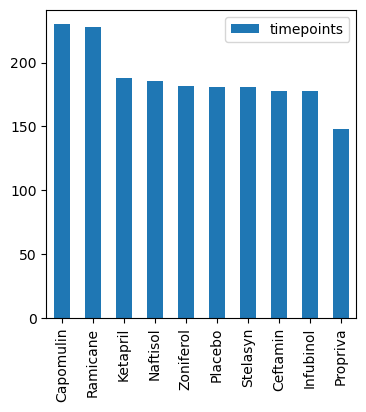

In [73]:
no_mice_bar = pd.DataFrame({"timepoints": [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]},
                          index=["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo",
                                "Stelasyn", "Ceftamin", "Infubinol", "Propriva"])
no_mice_bar.plot(kind="bar", figsize= (4,4))
plt.show

Text(0, 0.5, 'Number of Mice Tested')

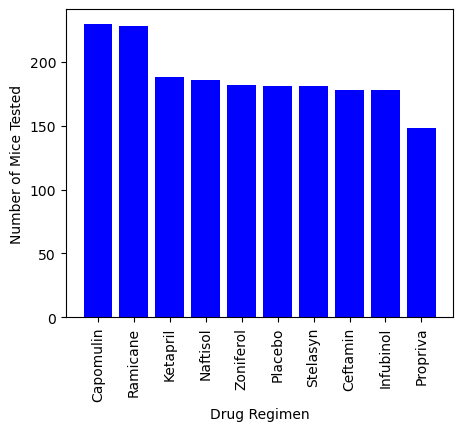

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(no_mice_df_transposed_sort))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(5,4))
plt.bar(x_axis, no_mice_df_transposed_sort["Timepoint"], color='b', alpha=1, align="edge")
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin",
                           "Infubinol", "Propriva"], rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

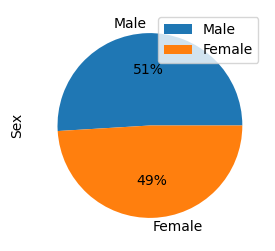

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pie_df = pd.DataFrame ({'Sex':[958, 922]}, index = ['Male', 'Female'])

sex_pie_df.plot(kind = 'pie', subplots=True, figsize=(6,3), autopct='%1.0f%%')

plt.show()


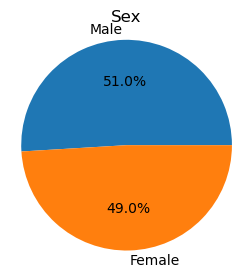

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_df = reduced_single.loc[:,['Sex']]
gender_list = sex_df.Sex.values.tolist()
female = gender_list.count('Female')
male = gender_list.count('Male')
sizes = [958, 922]
labels = 'Male', 'Female'
plt.figure(figsize=(3,3))
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Sex')
plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
most = reduced_single.groupby('Mouse ID').max()['Timepoint']

max_tp_df =pd.merge(most, reduced_single, on=(["Mouse ID", "Timepoint"]))
Cap_df = max_tp_df.loc[max_tp_df["Drug Regimen"] == "Capomulin",:]
cap_tp_df = Cap_df["Tumor Volume (mm3)"]
Ram_df = max_tp_df.loc[max_tp_df["Drug Regimen"] == "Ramicane",:]
ram_tp_df = Ram_df["Tumor Volume (mm3)"]
Inf_df = max_tp_df.loc[max_tp_df["Drug Regimen"] == "Infubinol",:]
inf_tp_df = Inf_df["Tumor Volume (mm3)"]
Cef_df = max_tp_df.loc[max_tp_df["Drug Regimen"] == "Ceftamin",:]
cef_tp_df = Cef_df["Tumor Volume (mm3)"]
max_tp_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [78]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for drug in drugs:
    a = max_tp_df.loc[max_tp_df['Drug Regimen'] == drug]
    tumor = a['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor)


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs:
    quartiles = max_tp_df.loc[max_tp_df["Drug Regimen"] == drug,'Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    print(f"----------------------------------------------------------------------------")
    print(f"{drug}'s potential outliers: {lowerb, upperb}")   
    print(f"{drug}'s interquartile range: {iqr}")
    print(f"{drug}'s lower quartile: {lowerq}")
    print(f"{drug}'s upper quartile: {upperq}")

    

----------------------------------------------------------------------------
Capomulin's potential outliers: (20.70456164999999, 51.83201549)
Capomulin's interquartile range: 7.781863460000004
Capomulin's lower quartile: 32.37735684
Capomulin's upper quartile: 40.1592203
----------------------------------------------------------------------------
Ramicane's potential outliers: (17.912664470000003, 54.30681135)
Ramicane's interquartile range: 9.098536719999998
Ramicane's lower quartile: 31.56046955
Ramicane's upper quartile: 40.65900627
----------------------------------------------------------------------------
Infubinol's potential outliers: (36.83290494999999, 82.74144559000001)
Infubinol's interquartile range: 11.477135160000003
Infubinol's lower quartile: 54.04860769
Infubinol's upper quartile: 65.52574285
----------------------------------------------------------------------------
Ceftamin's potential outliers: (25.355449580000002, 87.66645829999999)
Ceftamin's interquartile range

<function matplotlib.pyplot.show(close=None, block=None)>

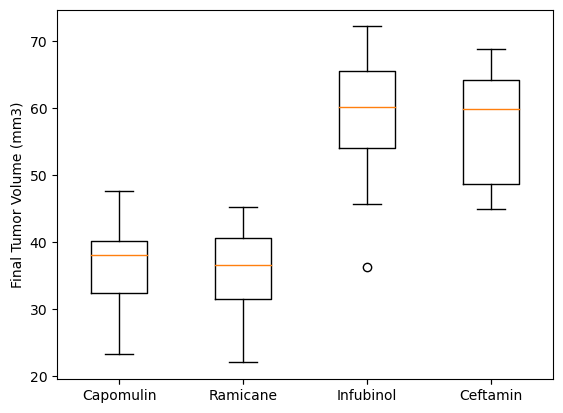

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure()
plt.xticks([1,2,3,4], rotation=0)
plt.boxplot(tumor_vol_data, labels=drugs)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

C:\Users\carli\AppData\Local\Temp\ipykernel_23344\2445269912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_tp.rename(columns={"Mouse ID": "Mouse_ID"}, inplace=True)


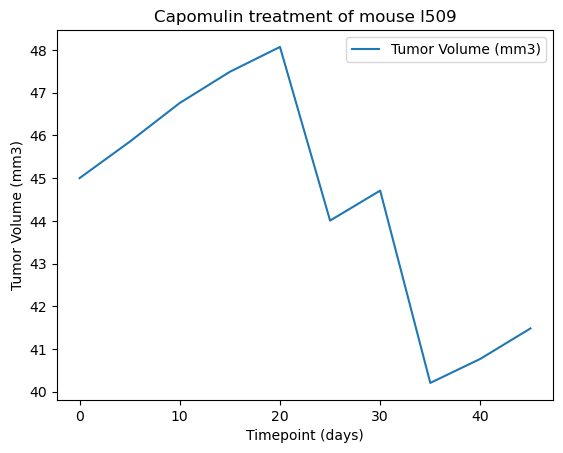

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tv_tp = reduced_single[["Timepoint", "Tumor Volume (mm3)", "Mouse ID","Drug Regimen"]]
tv_tp.rename(columns={"Mouse ID": "Mouse_ID"}, inplace=True)
new_df = tv_tp.loc[tv_tp["Drug Regimen"] == "Capomulin",:]
new = new_df.loc[new_df.Mouse_ID == 'l509', :]
new.plot('Timepoint', 'Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

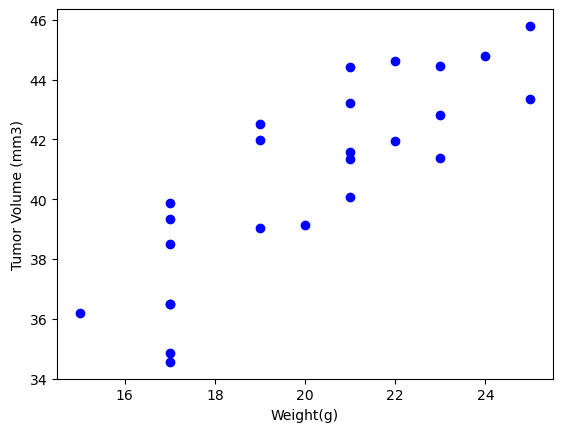

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scatter = reduced_single.loc[reduced_single["Drug Regimen"] == "Capomulin",:]
cap_scatter_df = cap_scatter[["Tumor Volume (mm3)", "Mouse ID", "Drug Regimen", "Weight (g)"]]
cap_scatter_plot = cap_scatter_df.groupby(['Mouse ID']).mean()

plt.scatter(cap_scatter_plot['Weight (g)'], cap_scatter_plot['Tumor Volume (mm3)'], color='b')
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

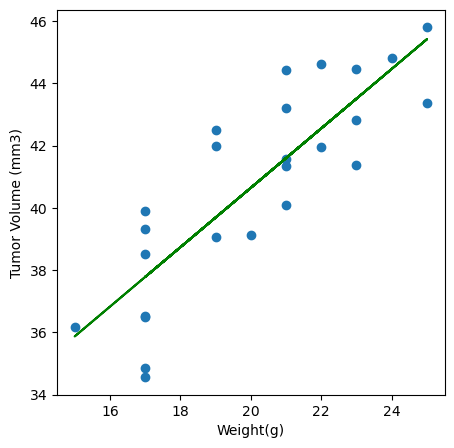

The correltion Coefficient is 0.8419363424694722


In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_scatter_plot['Weight (g)']
y_values = cap_scatter_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
linepl = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(5,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"g-")
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
CorCoef = np.corrcoef(x_values, y_values)[0, 1]
print(f"The correltion Coefficient is {CorCoef}")